# Hello

The {py:func}`swmmio.Model()` class provides a high level API for interfacing with SWMM models. With this object, we can access model data from related sections of the inp file, and, if results are available, from the rpt file. Let's start with a test SWMM model included within swmmio. 

[swmm-nrtestsuite](https://github.com/USEPA/swmm-nrtestsuite) repository.

<Axes: >

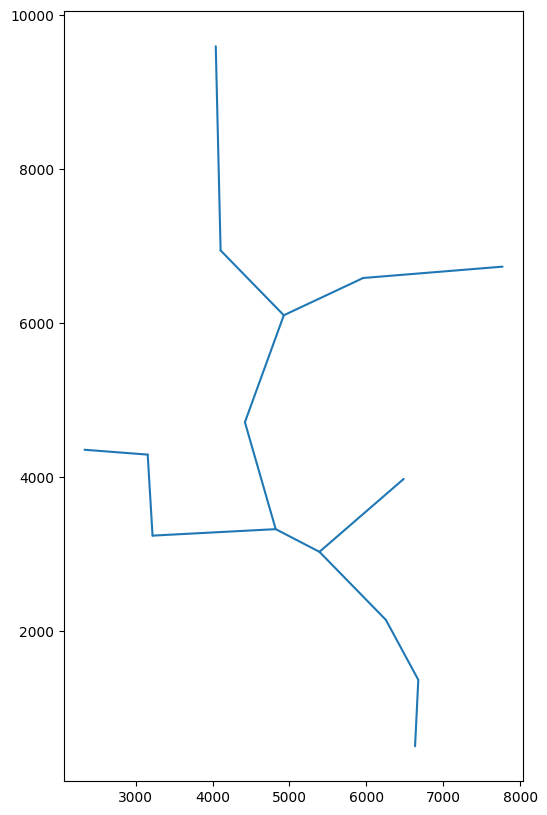

In [2]:
import swmmio
from swmmio.tests.data import MODEL_EX_1

# instantiate a swmmio model object
mymodel = swmmio.Model(MODEL_EX_1)

# dataframe with useful data related to model nodes, conduits, and subcatchments
nodes = mymodel.nodes.dataframe
links = mymodel.links.dataframe
subs = mymodel.subcatchments.dataframe

# enjoy all the Pandas functions
links

# (xc, yc), [x1, y1, x2, y2] = centroid_and_bbox_from_coords(jersey.inp.coordinates)

# url = 'https://raw.githubusercontent.com/SWMMEnablement/NCIMM-Black-White-Box/25a7dc8fc58f67d15954679f294d09b9061766a4/SWMM5_NCIMM/10070_H_Elements.inp'
# url = 'https://raw.githubusercontent.com/USEPA/swmm-nrtestsuite/refs/heads/dev/public/examples/Example1.inp'
# m = swmmio.Model(url)

mymodel.links.geodataframe.plot(capstyle='round', figsize=(10,10))
# jersey.nodes.geodataframe.plot('MaxDepth', ax=ax, markersize='InvertElev', zorder=2)

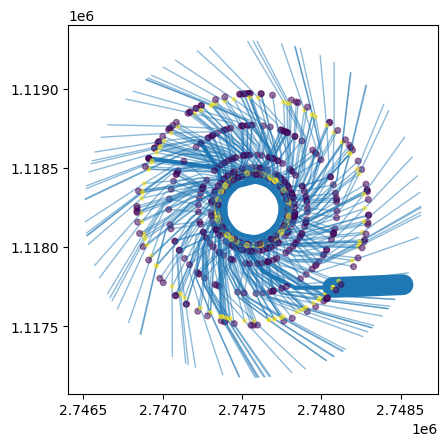

In [4]:
from swmmio.examples import jersey
ax = jersey.links.geodataframe.plot(linewidth=jersey.links.dataframe['Geom1']*3, capstyle='round')
jersey.nodes.geodataframe.plot('MaxDepth', ax=ax, markersize='InvertElev', zorder=2)

import numpy as np
from swmmio.utils.functions import rotate_model
from swmmio.utils.spatial import centroid_and_bbox_from_coords
(xc, yc), [x1, y1, x2, y2] = centroid_and_bbox_from_coords(jersey.inp.coordinates)


for rads in np.arange(0, 3*3.14, 0.1):
    jersey = rotate_model(jersey,rads=rads, origin=(xc, yc))
    jersey.links.geodataframe.plot(linewidth=1, capstyle='round', ax=ax, alpha=0.5)
    jersey.nodes.geodataframe.plot('MaxDepth', ax=ax, markersize='InvertElev', zorder=2, alpha=0.5)